## Exploratory Data Analysis (EDA) on Telecommunications Data

### Data Extraction

In [1]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir('..')
from src.dbconnection import get_dataFrame_from_database


#### Extract telecommunications data from the XDR_data table

In [2]:
xdr_data = get_dataFrame_from_database()


In [3]:
xdr_data.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+19,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,258378.0,2.082022e+14,3.366185e+10,3.552121e+13,L72021C,...,12383394.0,7733527.0,20777718.0,4373580.0,789467688.0,2257461.0,159416398.0,100667.0,17930493.0,834133937.0
1,7.277826e+18,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,259193.0,2.082014e+14,3.369897e+10,8.637690e+13,D87887C,...,14406245.0,12045811.0,7361239.0,14898689.0,64199571.0,10026888.0,575977464.0,8478541.0,47921617.0,95220649.0
2,1.304243e+19,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,310165.0,2.082017e+14,3.366362e+10,8.637690e+13,T83879A,...,5600892.0,5177075.0,6454399.0,19095671.0,115025679.0,12845795.0,797504408.0,3995473.0,43101888.0,139842223.0
3,1.304243e+19,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,257027.0,2.082019e+14,3.366759e+10,8.637690e+13,T21539C,...,15116495.0,1499927.0,20759712.0,9204089.0,481270736.0,13011424.0,320998972.0,8195716.0,33544051.0,530897456.0
4,7.349883e+18,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,280359.0,2.082015e+14,3.364570e+10,3.594111e+13,L14934A,...,8976531.0,21700919.0,12781484.0,8924970.0,187862645.0,16085787.0,497940391.0,4757382.0,53396982.0,222602016.0


In [4]:
xdr_data.describe()


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,2.980200e+05,300000.000000,300000.000000,3.000000e+05,2.988620e+05,2.978700e+05,2.988580e+05,244344.000000,244378.000000,300000.000000,...,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000020e+05,3.000000e+05,3.000000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893168e+18,288.611353,288.097173,8.103749e+04,2.148805e+10,2.447439e+12,2.241633e+13,619.781471,84.793351,23971.838588,...,6.710558e+06,6.345413e+06,6.725207e+06,6.359479e+06,2.439671e+08,4.782692e+06,2.432046e+08,4.768996e+06,1.127637e+07,2.441425e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


### Check datatype of extracted dataset

In [5]:
dataType_of_Dataset=xdr_data.dtypes
dataType_of_Dataset.head(dataType_of_Dataset.size)


Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

#### Number of rows and columns

In [6]:
print("Rows=", xdr_data.shape[0], "Columns=", xdr_data.shape[1])


Rows= 300002 Columns= 55


### Find any missing values

In [7]:
from scripts.tellcoAnalysis import find_missing_values
missing_summary = find_missing_values(xdr_data)
missing_summary.head(missing_summary.size)


From 55 columns selected, there are 41 columns with missing values.


,Missing values,Percent of Total Values,DataType
Nb of sec with 37500B < Vol UL,260508,86.8,float64
Nb of sec with 6250B < Vol UL < 37500B,223686,74.6,float64
Nb of sec with 125000B < Vol DL,195076,65.0,float64
TCP UL Retrans. Vol (Bytes),193298,64.4,float64
Nb of sec with 31250B < Vol DL < 125000B,187172,62.4,float64
Nb of sec with 1250B < Vol UL < 6250B,185788,61.9,float64
Nb of sec with 6250B < Vol DL < 31250B,176634,58.9,float64
TCP DL Retrans. Vol (Bytes),176292,58.8,float64
HTTP UL (Bytes),163620,54.5,float64
HTTP DL (Bytes),162948,54.3,float64


### Replace missing value with appropriate method

In [8]:
from scripts.tellcoAnalysis import replace_missing_values
xdr_data=replace_missing_values(xdr_data)


### Check replaced missing values

In [9]:
find_missing_values(xdr_data)


From 55 columns selected, there are 0 columns with missing values.


,Missing values,Percent of Total Values,DataType


### DataSet after replaced missing value

In [10]:
xdr_data.head(10)


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+19,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,258378.0,2.082022e+14,3.366185e+10,3.552121e+13,L72021C,...,12383394.0,7733527.0,20777718.0,4373580.0,789467688.0,2257461.0,159416398.0,100667.0,17930493.0,834133937.0
1,7.277826e+18,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,259193.0,2.082014e+14,3.369897e+10,8.637690e+13,D87887C,...,14406245.0,12045811.0,7361239.0,14898689.0,64199571.0,10026888.0,575977464.0,8478541.0,47921617.0,95220649.0
2,1.304243e+19,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,310165.0,2.082017e+14,3.366362e+10,8.637690e+13,T83879A,...,5600892.0,5177075.0,6454399.0,19095671.0,115025679.0,12845795.0,797504408.0,3995473.0,43101888.0,139842223.0
3,1.304243e+19,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,257027.0,2.082019e+14,3.366759e+10,8.637690e+13,T21539C,...,15116495.0,1499927.0,20759712.0,9204089.0,481270736.0,13011424.0,320998972.0,8195716.0,33544051.0,530897456.0
4,7.349883e+18,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,280359.0,2.082015e+14,3.364570e+10,3.594111e+13,L14934A,...,8976531.0,21700919.0,12781484.0,8924970.0,187862645.0,16085787.0,497940391.0,4757382.0,53396982.0,222602016.0
5,1.304243e+19,4/23/2019 2:56,528.0,4/26/2019 3:32,539.0,261355.0,2.082014e+14,3.366496e+10,8.637690e+13,D85726C,...,20653151.0,1555957.0,20521734.0,4465643.0,127262487.0,5707486.0,520439205.0,12451416.0,26449797.0,184127859.0
6,1.304243e+19,4/23/2019 2:57,472.0,4/26/2019 2:57,393.0,259200.0,2.082010e+14,3.366564e+10,8.637690e+13,D33038A,...,414161.0,10368870.0,13183445.0,14162774.0,125962800.0,15601326.0,562276617.0,13465365.0,57911829.0,152493811.0
7,1.304243e+19,4/23/2019 3:03,564.0,4/26/2019 14:08,509.0,299101.0,2.082019e+14,3.369882e+10,8.637690e+13,D83824B,...,19261657.0,2148102.0,5504119.0,5874242.0,213410488.0,13699543.0,37772767.0,11220532.0,35600382.0,244954786.0
8,1.304243e+19,4/23/2019 3:06,824.0,4/26/2019 17:08,935.0,309737.0,2.082017e+14,3.376183e+10,8.637690e+13,T21327B,...,23021696.0,20558371.0,18850728.0,18867802.0,146031317.0,2948967.0,131952444.0,5631234.0,51876348.0,199066480.0
9,1.304243e+19,4/23/2019 3:15,409.0,4/26/2019 16:45,766.0,307815.0,2.082014e+14,3.376108e+10,8.637690e+13,D88889B,...,16201198.0,17554677.0,317158.0,4911039.0,744258451.0,13975116.0,374861499.0,4407525.0,44296048.0,768563068.0


In [11]:
xdr_data['Dur. (ms).1']


0         258378737.0
1         259193285.0
2         310165689.0
3         257027446.0
4         280359335.0
             ...     
299997    293050215.0
299998    278043794.0
299999    306197985.0
300000    263929536.0
300001    289580077.0
Name: Dur. (ms).1, Length: 300002, dtype: float64

In [12]:
xdr_data['Dur. (ms)']


0         258378.0
1         259193.0
2         310165.0
3         257027.0
4         280359.0
            ...   
299997    293050.0
299998    278043.0
299999    306197.0
300000    263929.0
300001    289580.0
Name: Dur. (ms), Length: 300002, dtype: float64

## Convert Byte into MB

In [13]:
from scripts.tellcoAnalysis import convertByteIntoMegaByte
xdr_data=convertByteIntoMegaByte(xdr_data)


In [14]:
xdr_data.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+13,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,258378.0,2.082022e+08,33661.848209,3.552121e+07,L72021C,...,12.383394,7.733527,20.777718,4.373580,789.467688,2.257461,159.416398,0.100667,17.930493,834.133937
1,7.277826e+12,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,259193.0,2.082014e+08,33698.968192,8.637690e+07,D87887C,...,14.406245,12.045811,7.361239,14.898689,64.199571,10.026888,575.977464,8.478541,47.921617,95.220649
2,1.304243e+13,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,310165.0,2.082017e+08,33663.620239,8.637690e+07,T83879A,...,5.600892,5.177075,6.454399,19.095671,115.025679,12.845795,797.504408,3.995473,43.101888,139.842223
3,1.304243e+13,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,257027.0,2.082019e+08,33667.585643,8.637690e+07,T21539C,...,15.116495,1.499927,20.759712,9.204089,481.270736,13.011424,320.998972,8.195716,33.544051,530.897456
4,7.349883e+12,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,280359.0,2.082015e+08,33645.696412,3.594111e+07,L14934A,...,8.976531,21.700919,12.781484,8.924970,187.862645,16.085787,497.940391,4.757382,53.396982,222.602016


### Find  outliers

In [15]:
from scripts.tellcoAnalysis import get_outlier_summary
outlier_summary=get_outlier_summary(xdr_data)
outlier_summary.head(outlier_summary.size)


From 50 selected numerical columns, there are 31 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,0
1,Start ms,0
2,End ms,0
3,Dur. (ms),14368
4,IMSI,26500
5,MSISDN/Number,49484
6,IMEI,0
7,Avg RTT DL (ms),15436
8,Avg RTT UL (ms),17950
9,Avg Bearer TP DL (kbps),26470


### Box Plot before remove outlier

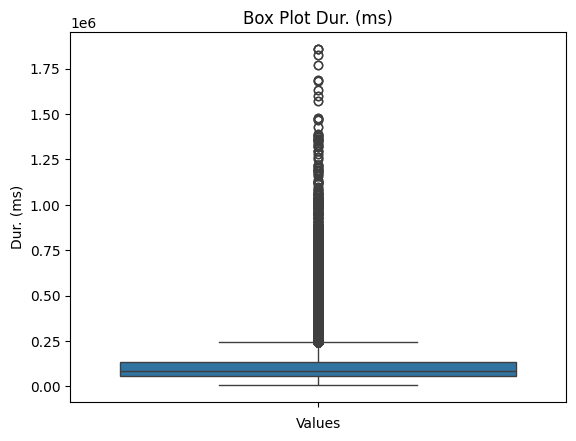

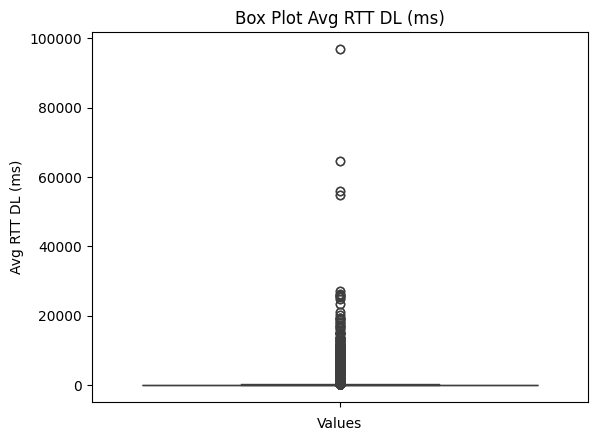

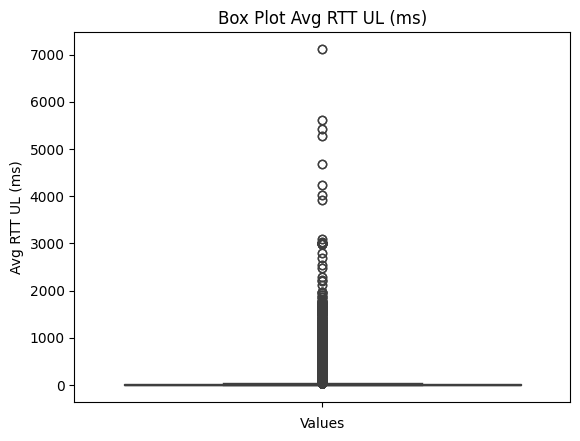

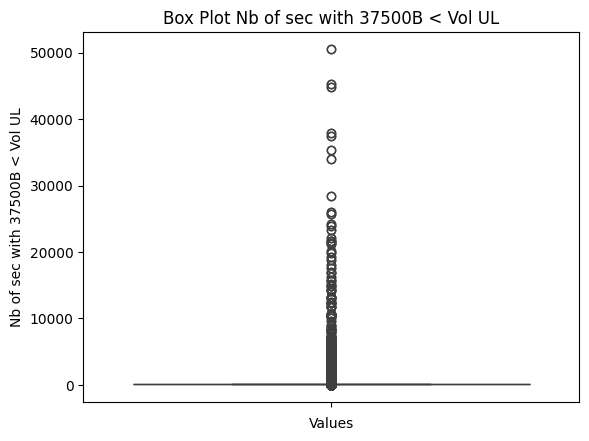

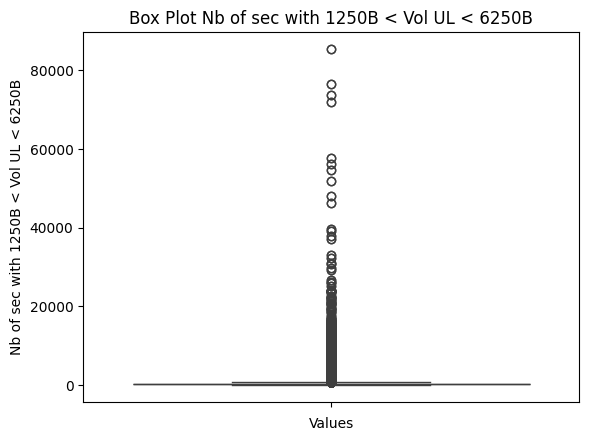

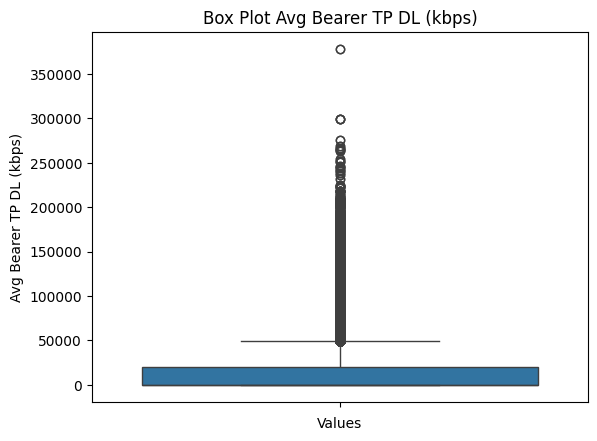

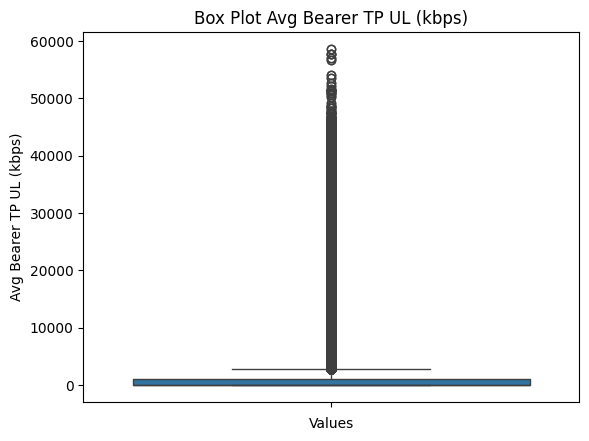

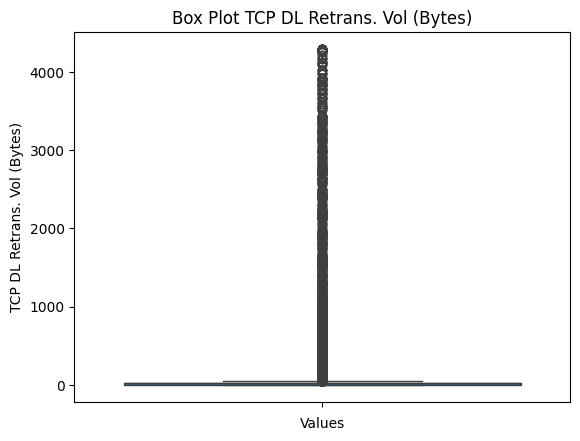

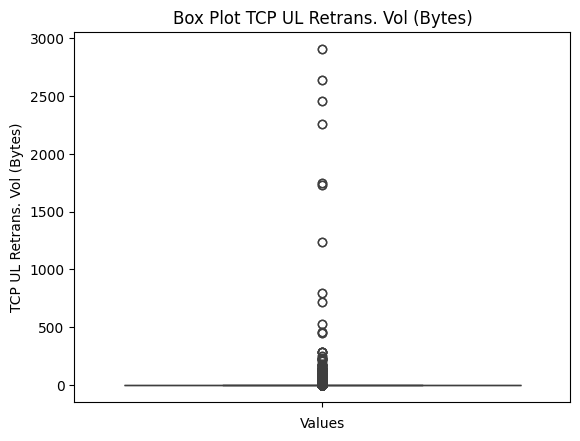

In [16]:
from scripts.tellcoAnalysis import getBoxPlotToCheckOutlier
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 37500B < Vol UL','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])


### Remove outliers

In [17]:
from scripts.tellcoAnalysis import remove_outliers_winsorization
# Remove outliers using winsorization
xdr_data=remove_outliers_winsorization(xdr_data)


In [18]:
get_outlier_summary(xdr_data)


From 50 selected numerical columns, there are 0 columns with outlier values.


,Variable,Number of Outliers
0,Bearer Id,0
1,Start ms,0
2,End ms,0
3,Dur. (ms),0
4,IMSI,0
5,MSISDN/Number,0
6,IMEI,0
7,Avg RTT DL (ms),0
8,Avg RTT UL (ms),0
9,Avg Bearer TP DL (kbps),0


### Box Plot After remove Outlier

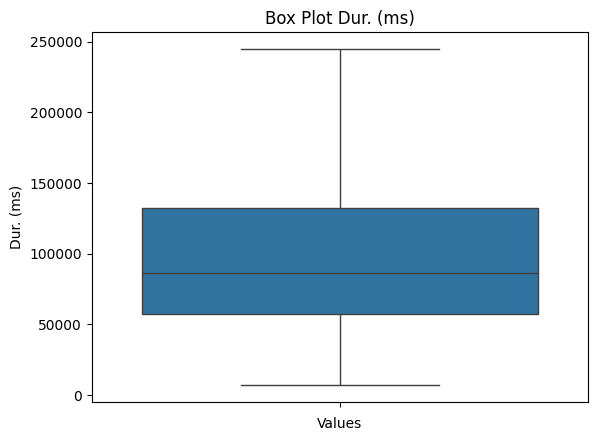

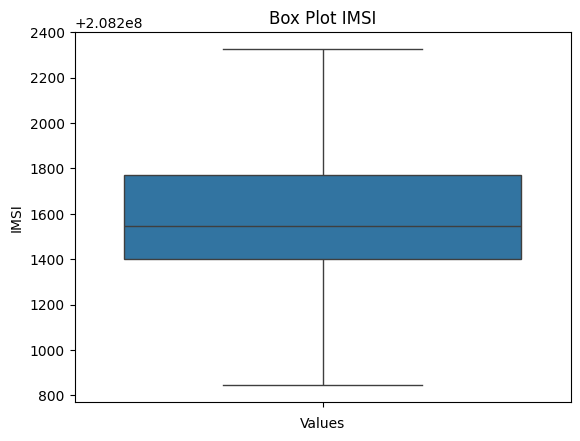

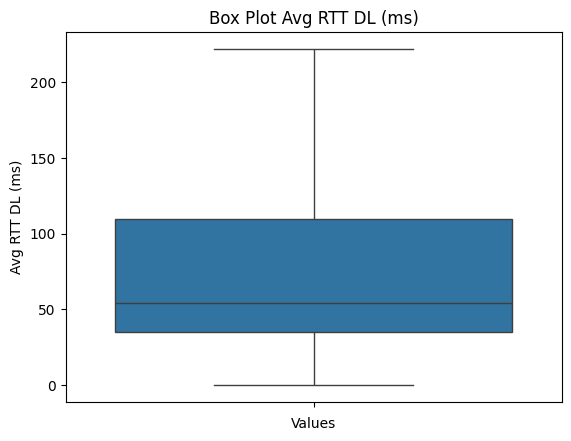

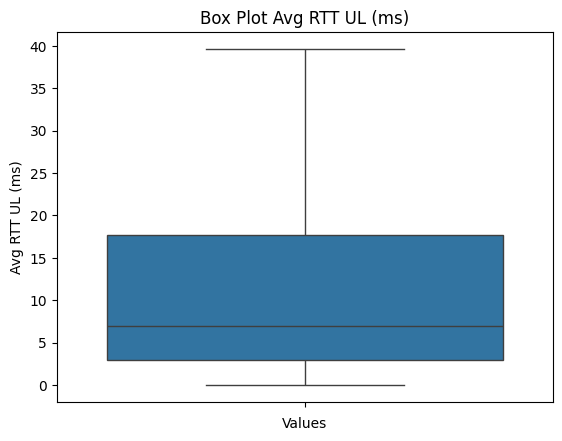

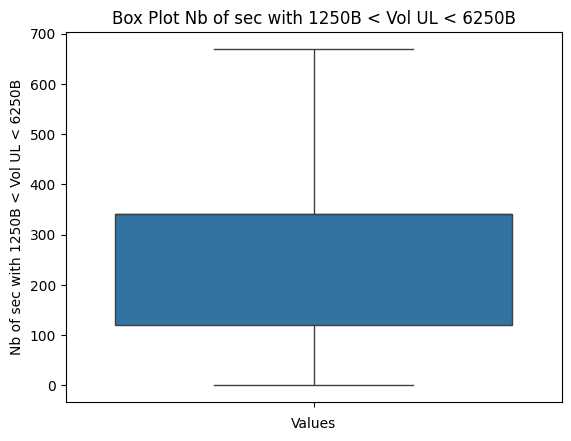

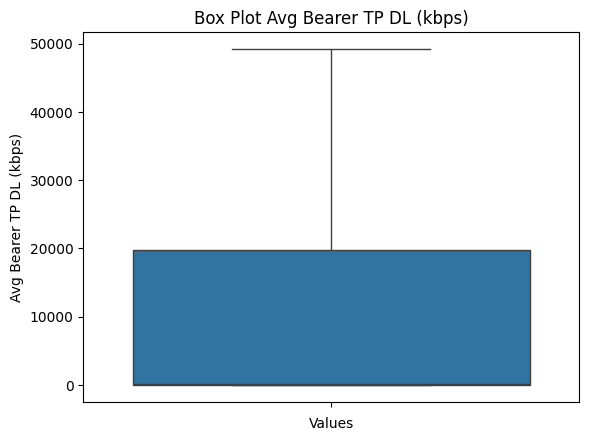

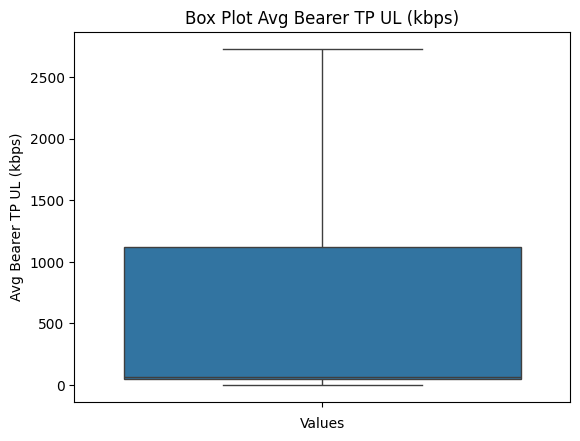

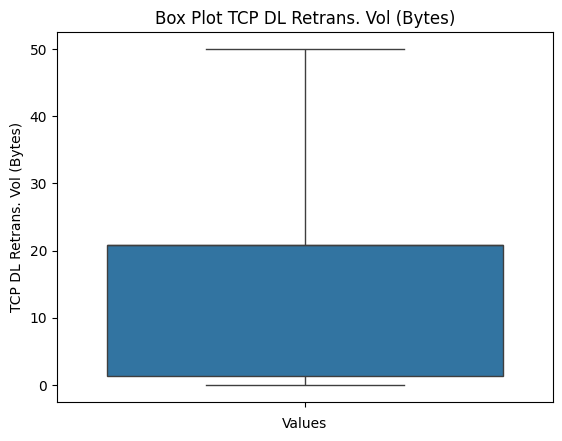

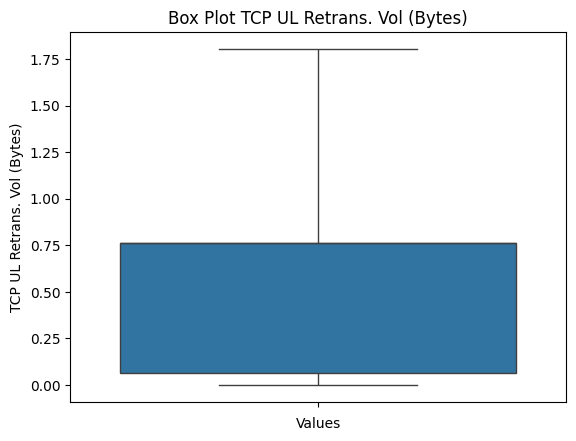

In [19]:
getBoxPlotToCheckOutlier(xdr_data,['Dur. (ms)','IMSI','Avg RTT DL (ms)','Avg RTT UL (ms)','Nb of sec with 1250B < Vol UL < 6250B','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','TCP DL Retrans. Vol (Bytes)','TCP UL Retrans. Vol (Bytes)'])


### User overview analysis

#### User Device Analysis

In [20]:
top_handsets = xdr_data['Handset Type'].value_counts().head(10)
top_manufacturers = xdr_data['Handset Manufacturer'].value_counts().head(3)


### Top Ten handset types

In [21]:
print(top_handsets)


Handset Type
Huawei B528S-23A                40648
Apple iPhone 6S (A1688)         18838
Apple iPhone 6 (A1586)          18046
undefined                       17974
Apple iPhone 7 (A1778)          12652
Apple iPhone Se (A1723)         10374
Apple iPhone 8 (A1905)           9986
Apple iPhone Xr (A2105)          9136
Samsung Galaxy S8 (Sm-G950F)     9040
Apple iPhone X (A1901)           7626
Name: count, dtype: int64


<Axes: xlabel='Handset Type'>

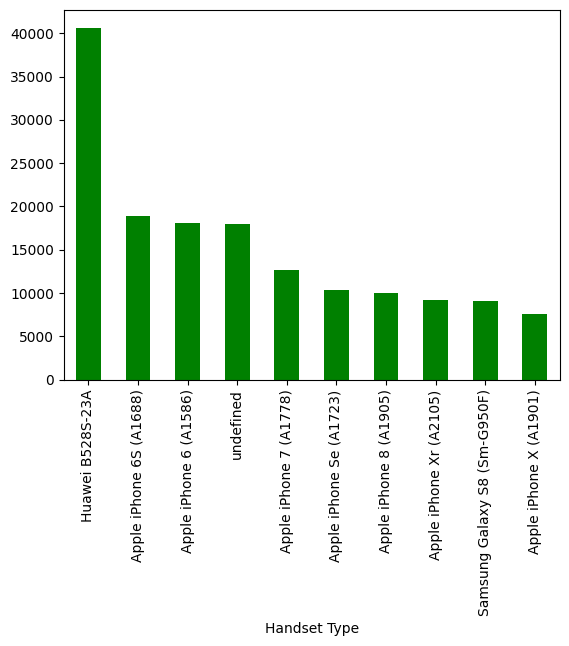

In [22]:
top_handsets.plot(kind='bar',color='green')


#### Top three handset manufacturers

In [23]:
top_manufacturers.head()


Handset Manufacturer
Apple      120274
Samsung     81678
Huawei      68846
Name: count, dtype: int64

<Axes: xlabel='Handset Manufacturer'>

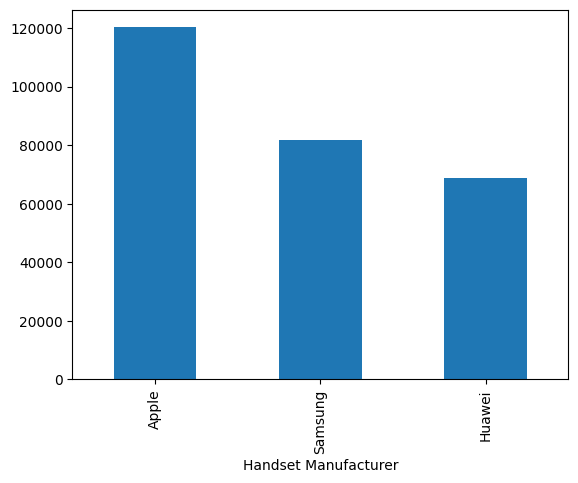

In [24]:
top_manufacturers.plot(kind='bar')


### The top 5 handset type per top 3 handset manufacturer

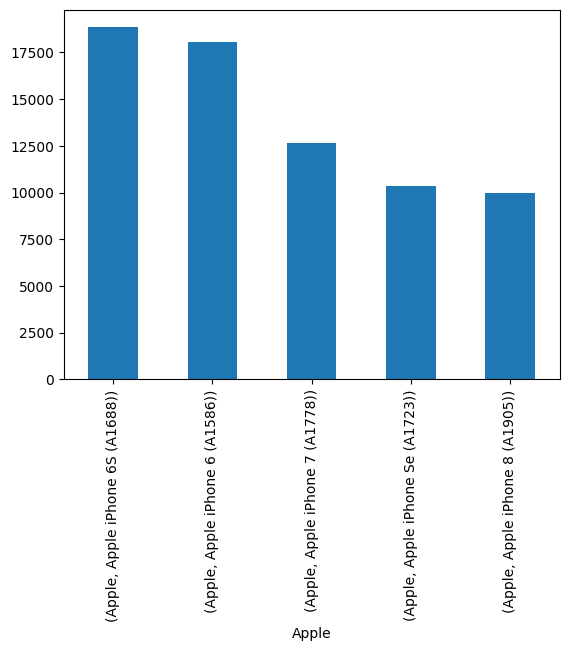

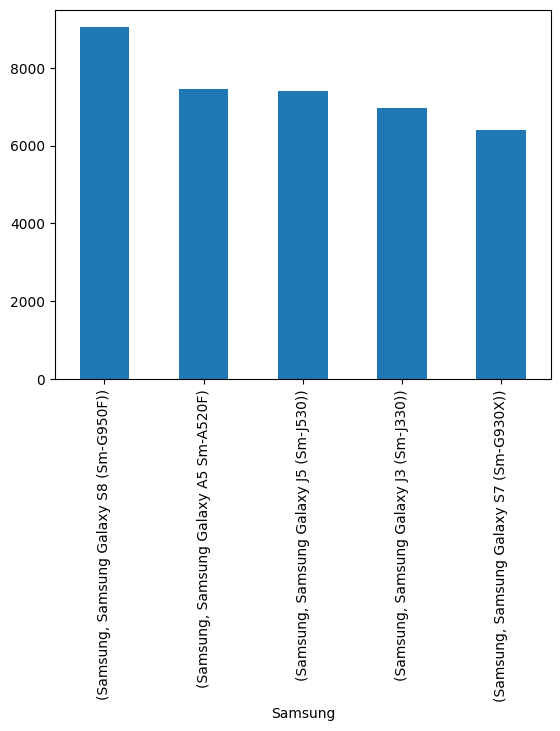

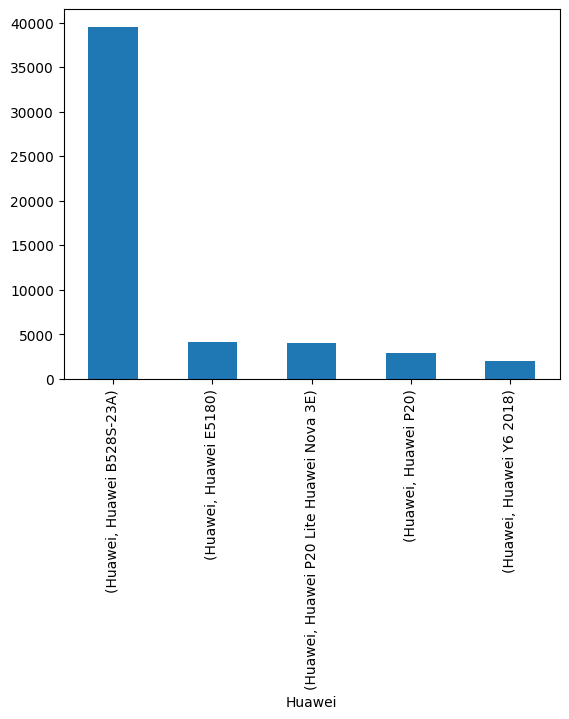

In [25]:
filtered_data = xdr_data[xdr_data['Handset Manufacturer'].isin(top_manufacturers.index)]

for h_manufacturer in top_manufacturers.index:
    top_5_handsets_per_manufacturer = filtered_data[filtered_data['Handset Manufacturer']==h_manufacturer].groupby('Handset Manufacturer')['Handset Type'].value_counts().head(5)
    top_5_handsets_per_manufacturer.plot(kind='bar')
    plt.xlabel(h_manufacturer)
    plt.show()


In [26]:
xdr_data.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+13,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,244912.0,2.082022e+08,33661.848209,3.552121e+07,L72021C,...,12.383394,7.733527,20.777718,4.373580,789.467688,2.257461,159.416398,0.100667,17.930493,834.133937
1,7.277826e+12,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,244912.0,2.082014e+08,33698.968192,8.637690e+07,D87887C,...,14.406245,12.045811,7.361239,14.898689,64.199571,10.026888,575.977464,8.478541,47.921617,95.220649
2,1.304243e+13,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,244912.0,2.082017e+08,33663.620239,8.637690e+07,T83879A,...,5.600892,5.177075,6.454399,19.095671,115.025679,12.845795,797.504408,3.995473,43.101888,139.842223
3,1.304243e+13,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,244912.0,2.082019e+08,33667.585643,8.637690e+07,T21539C,...,15.116495,1.499927,20.759712,9.204089,481.270736,13.011424,320.998972,8.195716,33.544051,530.897456
4,7.349883e+12,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,244912.0,2.082015e+08,33645.696412,3.594111e+07,L14934A,...,8.976531,21.700919,12.781484,8.924970,187.862645,16.085787,497.940391,4.757382,53.396982,222.602016


### Aggregate Each Application per User

In [27]:
from scripts.tellcoAnalysis import aggregate_xdr_data
aggregated_xdr_data=aggregate_xdr_data(xdr_data)
aggregated_xdr_data.head(10)


/home/osho/Projects/10AcadameyDADSML/10AcadameyWeek2Analysis/scripts/tellcoAnalysis.py:163: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  aggregated_df = df.groupby('MSISDN/Number').agg(


,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
MSISDN/Number,,,,,,,,,,
33601.675527,365902.452568,1330.975322,9846.673594,1636.847602,1636.847602,16095.574564,319437.400744,317753.065420,68224358.0,7.206746e+15
33601.712373,679.233900,1.204948,44.722424,5.670824,5.670824,24.957882,566.190620,1572.351762,77006.0,2.622897e+13
33601.712551,1801.221892,6.072580,19.227126,7.192166,7.192166,33.903770,1679.590092,1364.970876,104956.0,1.383508e+13
33601.713789,3174.674280,8.416804,52.067962,6.570332,6.570332,119.522756,2846.798236,2652.777252,240596.0,2.925542e+13
33601.714799,356.661358,4.979260,28.639396,6.529654,6.529654,49.746000,220.574004,165.188226,352044.0,2.622897e+13
33601.717042,669.382882,0.214128,13.640208,3.745052,3.745052,46.477050,577.992988,664.335202,255836.0,1.469977e+13
33601.718622,2630.947498,11.519646,66.376188,11.664120,11.664120,73.577864,2318.411972,2246.066560,165180.0,2.925542e+13
33601.719194,2670.678620,4.524200,62.302156,11.969564,11.969564,101.452636,2400.034194,475.115646,352918.0,2.925542e+13
33601.720129,874.923950,5.571354,5.173572,1.548162,1.548162,45.727944,760.104536,500.431512,173560.0,2.622897e+13


### Exploratory Data Analysis (EDA) on Aggregated Data

In [28]:
aggregated_xdr_data.describe()


,Total_DL_And_UL,Total_Social_Media_Data,Total_Google_Data,Total_Email_Data,Total_YouTube_Data,Total_Netflix_Data,Total_Gaming_Data,Total_Other_Data,Total_Duration_Data,Total_xDR_Sessions
count,9.003800e+04,90038.000000,90038.000000,90038.000000,90038.000000,9.003800e+04,9.003800e+04,9.003800e+04,9.003800e+04,9.003800e+04
mean,1.651862e+03,6.091636,46.777730,7.527213,7.527213,7.539736e+01,1.433848e+03,1.430623e+03,3.317692e+05,3.378221e+13
std,8.015839e+04,297.863443,2277.084818,368.225152,368.225152,3.687736e+03,6.949880e+04,7.002175e+04,1.622427e+07,1.650228e+15
min,6.649802e+01,0.003126,0.047416,0.036352,0.036352,3.691380e-01,6.127160e-01,1.023538e+00,1.429200e+04,1.383508e+13
25%,7.171118e+02,2.420182,22.763652,3.345194,3.345194,3.712936e+01,5.763017e+02,5.699718e+02,1.401400e+05,1.469977e+13
50%,1.236698e+03,4.601812,33.416224,5.587401,5.587401,5.340146e+01,1.085822e+03,1.077178e+03,2.041480e+05,2.608485e+13
75%,1.713987e+03,6.609383,47.073231,7.684666,7.684666,7.580785e+01,1.554529e+03,1.548834e+03,3.455980e+05,2.925542e+13
max,2.404942e+07,89365.888870,683192.753847,110477.164717,110477.164717,1.106428e+06,2.085108e+07,2.100805e+07,4.867482e+09,4.951088e+17


## Variable transformations

### Segment the users into the top five decile classes and Calculate Total Data per Decile Class

In [29]:
from scripts.tellcoAnalysis import segment_users_and_calculate_total_data
total_data_per_decile = segment_users_and_calculate_total_data(xdr_data)
print(total_data_per_decile)


decile_class
Decile 1    2.976810e+07
Decile 2    4.723996e+07
Decile 3    1.217817e+07
Decile 4    2.970748e+07
Decile 5    2.983668e+07
Name: Total_DL_+_UL, dtype: float64


/home/osho/Projects/10AcadameyDADSML/10AcadameyWeek2Analysis/scripts/tellcoAnalysis.py:197: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_data_per_decile = data.groupby('decile_class')['Total_DL_+_UL'].sum()


### Graphical Representation of Total Dl and Ul with in Decile

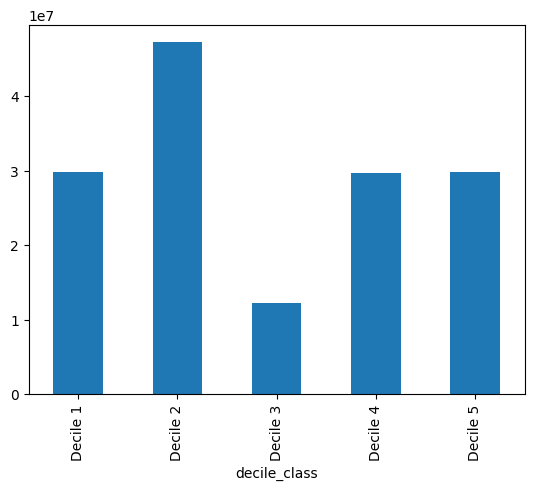

In [30]:
total_data_per_decile.plot(kind='bar')
plt.show()


In [31]:
xdr_data.describe()


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL
count,3.000020e+05,300002.000000,300002.000000,300002.000000,3.000020e+05,300002.000000,3.000020e+05,300002.000000,300002.000000,300002.000000,...,300002.000000,300002.000000,300002.000000,300002.000000,300002.000000,300002.000000,300002.000000,300002.000000,300002.000000,300002.000000
mean,1.013887e+13,499.188200,498.800880,99572.128983,2.082015e+08,33669.992180,4.847455e+07,72.862020,12.037797,11112.355328,...,11.009410,11.626852,11.001755,422.044703,8.288398,421.100544,8.264799,41.121201,454.643430,495.764631
std,2.883595e+12,288.610391,288.096213,59084.085654,3.925661e+02,35.325834,2.237355e+07,51.361628,11.040899,17189.321254,...,6.345413,6.725207,6.359479,243.967088,4.782692,243.204604,4.768996,11.269215,244.141654,244.380211
min,6.917538e+12,0.000000,0.000000,7142.000000,2.082008e+08,33601.675527,4.400152e+05,0.000000,0.000000,0.000000,...,0.000105,0.000042,0.000035,0.002516,0.000059,0.003290,0.000148,9.503715,7.114041,28.956107
25%,7.349883e+12,250.000000,251.000000,57442.000000,2.082014e+08,33651.508781,3.546261e+07,35.000000,3.000000,43.000000,...,5.517965,5.777156,5.475981,210.473253,4.128476,210.186872,4.145943,33.222029,243.107173,284.476442
50%,7.349883e+12,499.000000,500.000000,86399.000000,2.082015e+08,33663.797508,3.572241e+07,54.000000,7.000000,63.000000,...,11.013447,11.642217,10.996384,423.408104,8.291208,421.803006,8.267071,41.143242,455.840911,496.896342
75%,1.304243e+13,749.000000,750.000000,132430.000000,2.082018e+08,33684.730950,8.611970e+07,109.795706,17.662883,19710.000000,...,16.515562,17.470478,16.507268,633.174167,12.431624,631.691786,12.384148,49.034238,665.705138,706.500344
max,1.318654e+13,999.000000,999.000000,244912.000000,2.082023e+08,33734.564203,9.900120e+07,221.989265,39.657207,49210.500000,...,22.011962,23.259189,22.011955,843.441889,16.558794,843.442489,16.558816,72.752552,902.969616,953.624448


### Non-Graphical 
### Univariate Analysis: Dispersion Parameters

In [32]:
from scripts.tellcoAnalysis import compute_dispersion_parameters
dispersion_results = compute_dispersion_parameters(xdr_data)


/home/osho/Projects/10AcadameyDADSML/10AcadameyWeek2Analysis/scripts/tellcoAnalysis.py:221: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
/home/osho/Projects/10AcadameyDADSML/10AcadameyWeek2Analysis/scripts/tellcoAnalysis.py:221: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()
/home/osho/Projects/10AcadameyDADSML/10AcadameyWeek2Analysis/scripts/tellcoAnalysis.py:221: RuntimeWarning: invalid value encountered in scalar divide
  dispersion_params.loc['Coef Var', column] = data[column].std() / data[column].mean()


In [33]:
dispersion_results.head()


,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL
Range,6269003648590.668945,999.0,999.0,237770.0,1481.369432,132.888676,98561186.125774,221.989265,39.657207,49210.5,...,22.011857,23.259147,22.01192,843.439373,16.558735,843.439199,16.558668,63.248836,895.855575,924.668341
Variance,8315118714275969087045632.0,83295.957901,82999.42778,3490929177.580046,154108.15238,1247.914561,500575890200428.125,2638.016846,121.901452,295472765.168855,...,40.264263,45.228407,40.442975,59519.939898,22.87414,59148.479634,22.74332,126.995201,59605.147053,59721.687358
Std Dev,2883594755557.023438,288.610391,288.096213,59084.085654,392.566112,35.325834,22373553.365535,51.361628,11.040899,17189.321254,...,6.345413,6.725207,6.359479,243.967088,4.782692,243.204604,4.768996,11.269215,244.141654,244.380211
IQR,5692542731480.580078,499.0,499.0,74988.0,370.342358,33.222169,50657094.738467,74.795706,14.662883,19667.0,...,10.997597,11.693322,11.031287,422.700914,8.303148,421.504914,8.238205,15.812209,422.597965,422.023902
Coef Var,0.28441,0.578159,0.577578,0.59338,0.000002,0.001049,0.461553,0.704916,0.917186,1.546866,...,0.576363,0.57842,0.578042,0.57806,0.577035,0.577545,0.577025,0.274049,0.536996,0.492936


### Graphical 
### Univariate Analysis

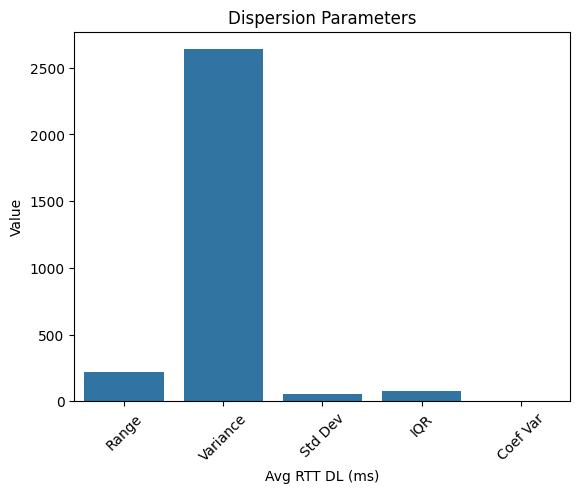

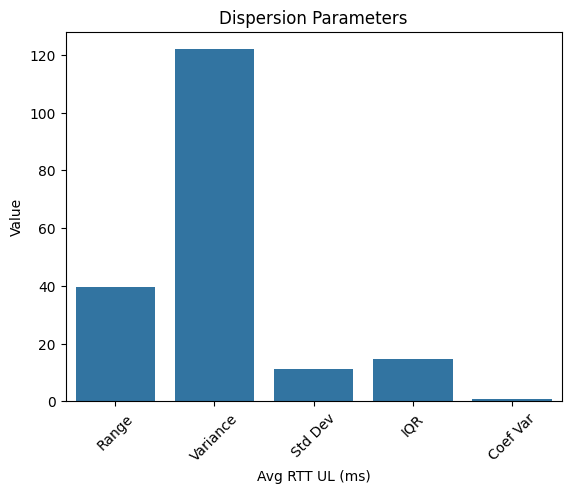

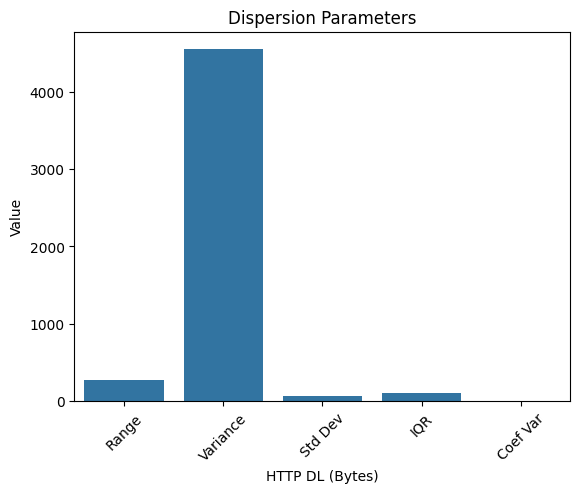

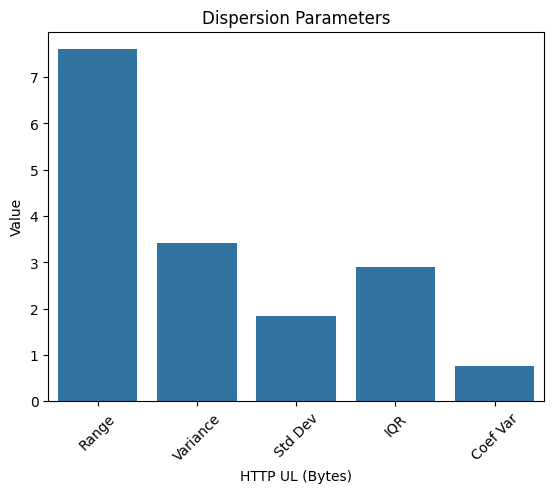

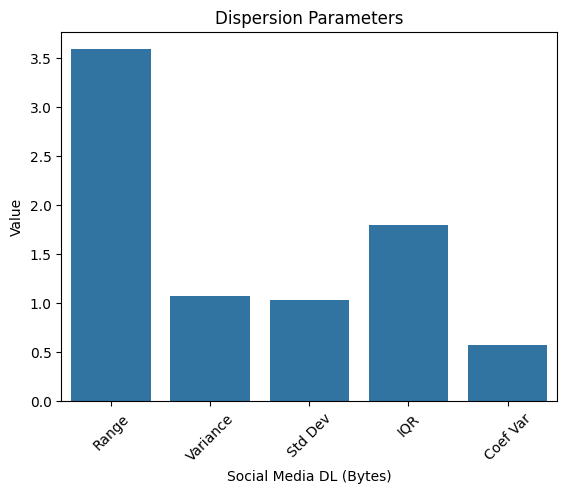

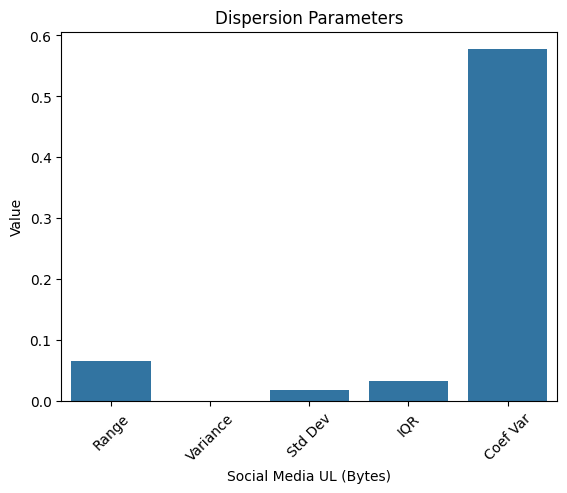

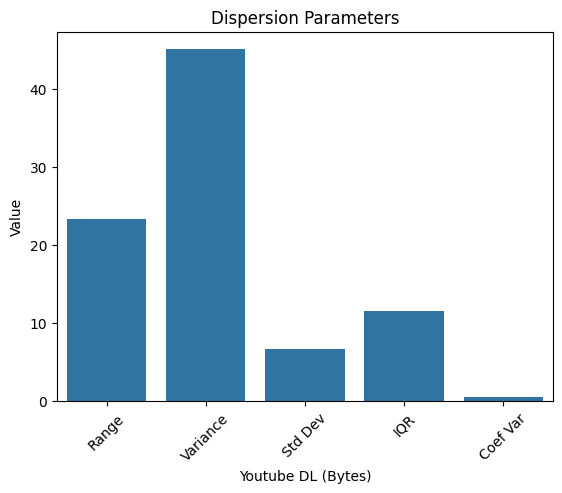

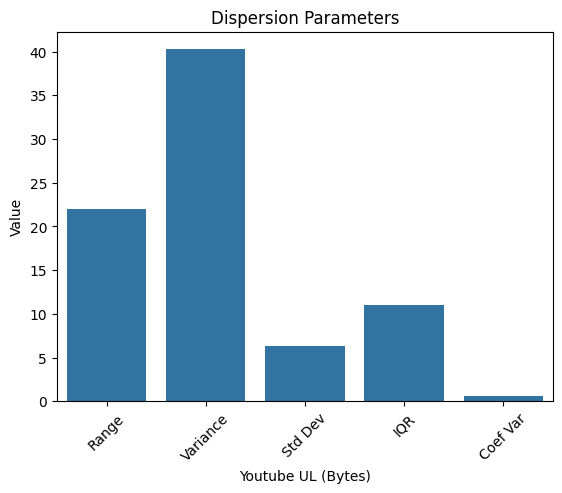

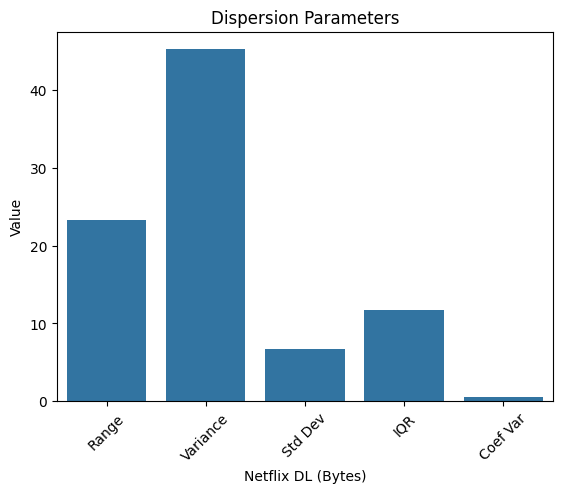

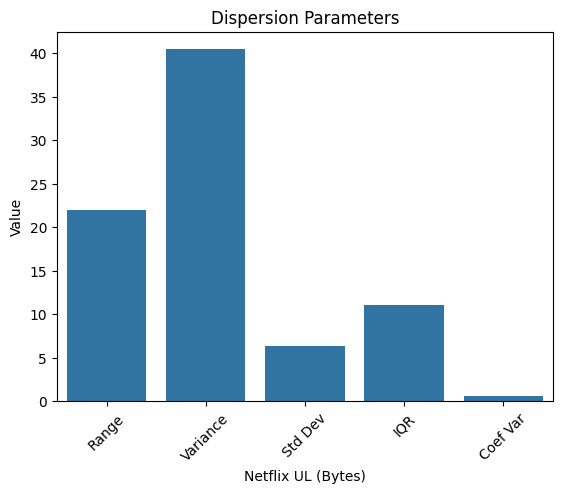

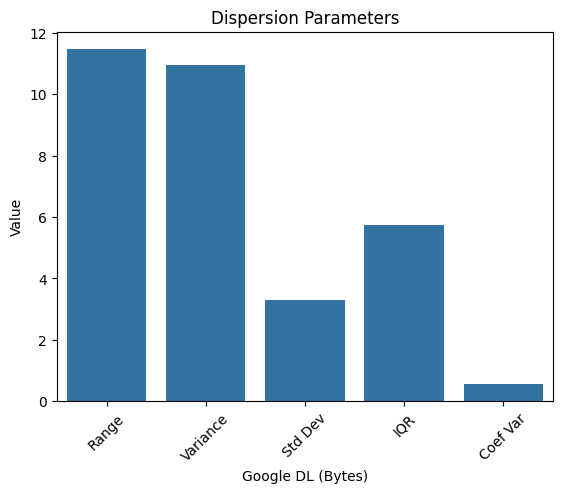

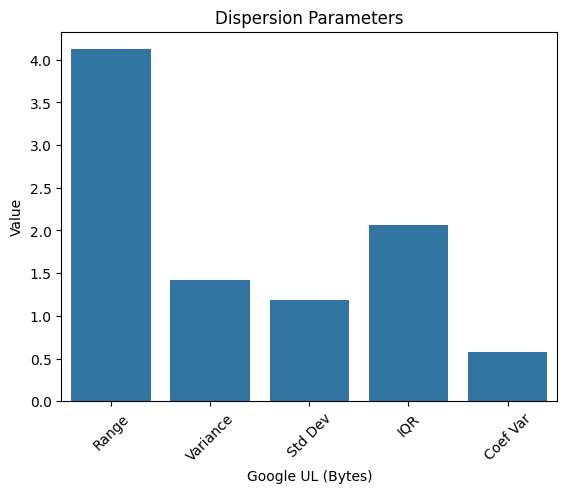

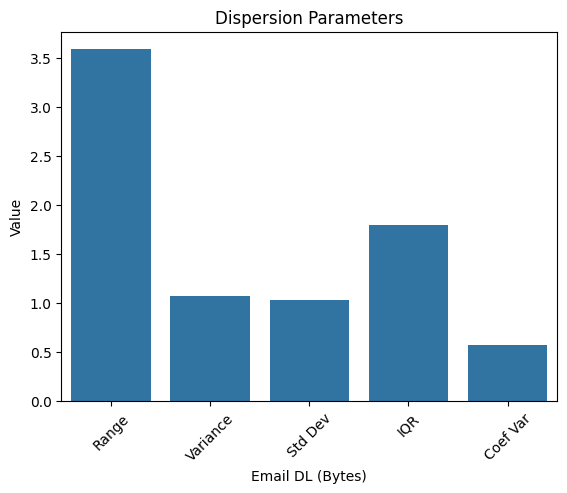

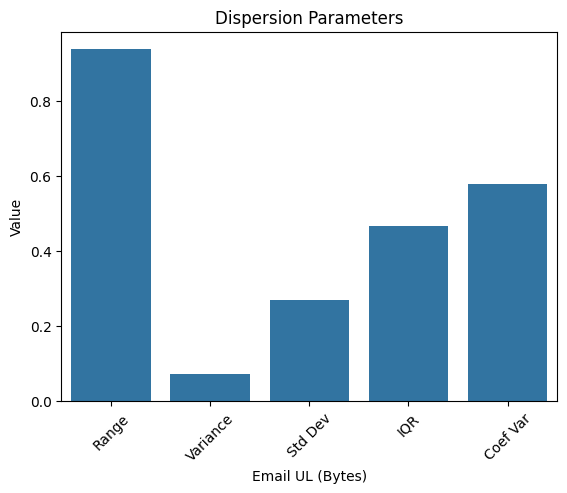

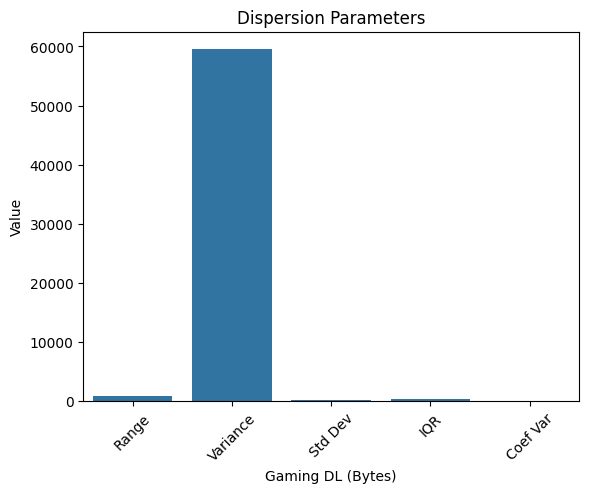

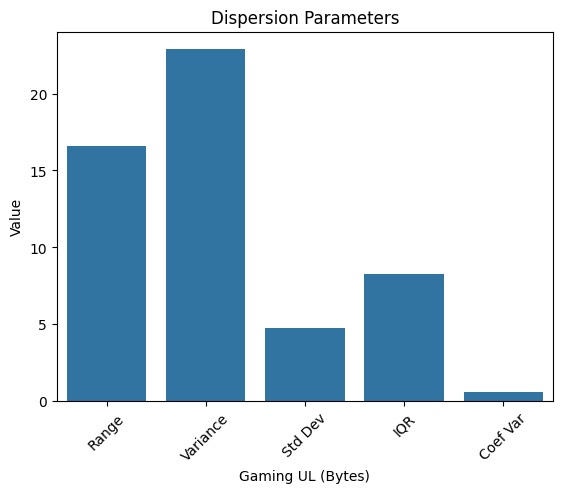

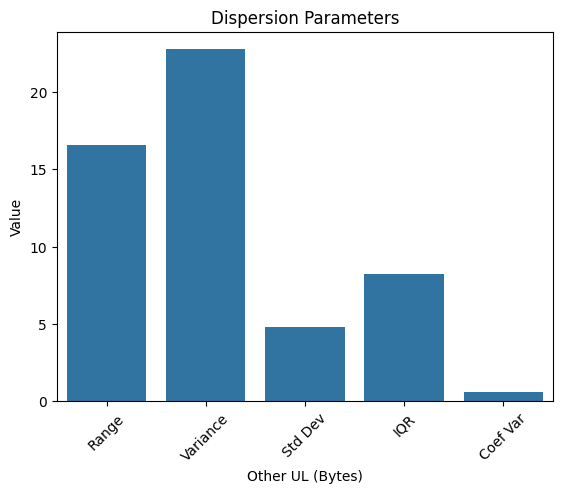

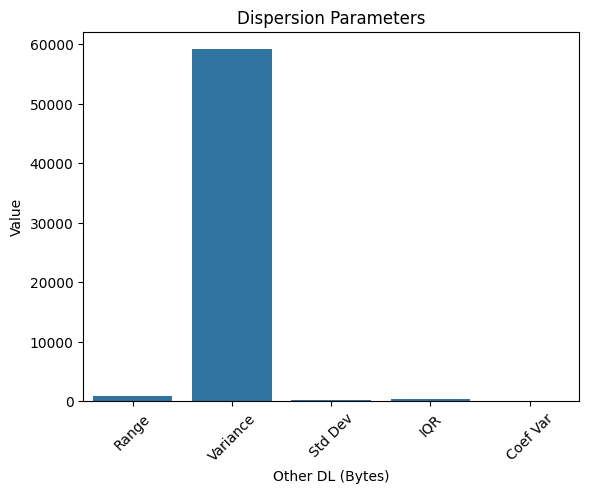

In [34]:
from scripts.tellcoAnalysis import plot_dispersion_parameters
plot_dispersion_parameters(dispersion_results,['Avg RTT DL (ms)','Avg RTT UL (ms)','HTTP DL (Bytes)','HTTP UL (Bytes)','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 'Other DL (Bytes)'])


### Bivariate Analysis
### Relationship Between Each Application and Total Data DL and UL

In [35]:
xdr_data.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class
0,1.304243e+13,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,244912.0,2.082022e+08,33661.848209,3.552121e+07,L72021C,...,20.777718,4.373580,789.467688,2.257461,159.416398,0.100667,17.930493,834.133937,852.064430,Decile 5
1,7.277826e+12,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,244912.0,2.082014e+08,33698.968192,8.637690e+07,D87887C,...,7.361239,14.898689,64.199571,10.026888,575.977464,8.478541,47.921617,95.220649,143.142266,Decile 5
2,1.304243e+13,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,244912.0,2.082017e+08,33663.620239,8.637690e+07,T83879A,...,6.454399,19.095671,115.025679,12.845795,797.504408,3.995473,43.101888,139.842223,182.944111,Decile 5
3,1.304243e+13,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,244912.0,2.082019e+08,33667.585643,8.637690e+07,T21539C,...,20.759712,9.204089,481.270736,13.011424,320.998972,8.195716,33.544051,530.897456,564.441507,Decile 5
4,7.349883e+12,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,244912.0,2.082015e+08,33645.696412,3.594111e+07,L14934A,...,12.781484,8.924970,187.862645,16.085787,497.940391,4.757382,53.396982,222.602016,275.998998,Decile 5


### Bivariate using correlation

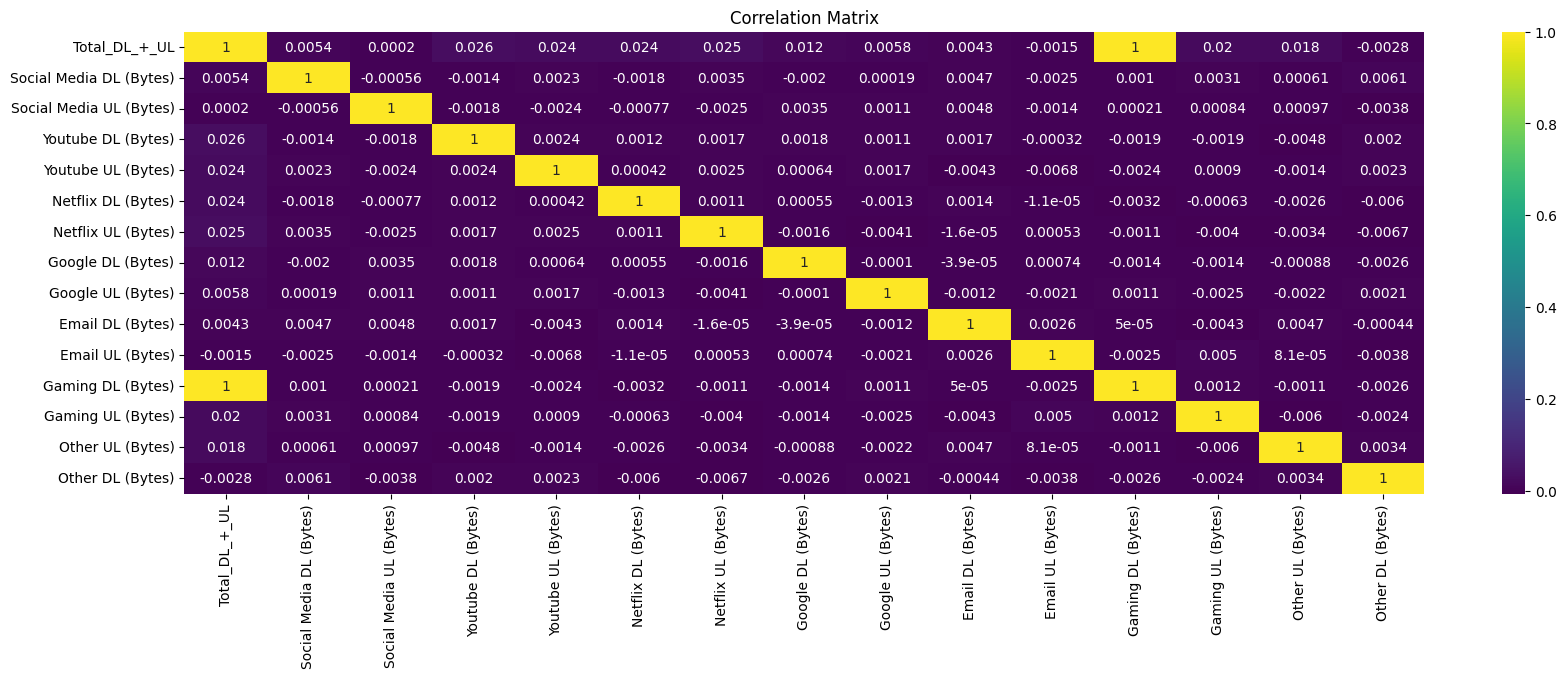

In [36]:
correlation_matrix = xdr_data[['Total_DL_+_UL','Social Media DL (Bytes)','Social Media UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)','Netflix UL (Bytes)','Google DL (Bytes)', 'Google UL (Bytes)','Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)', 'Other DL (Bytes)']].corr()
plt.figure(figsize=(20,6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')

plt.show()


### Correlation Analysis
### Computing a Correlation Matrix for Each Application

In [37]:
from scripts.tellcoAnalysis import correlationBetweenApplication


In [38]:
applicationData=correlationBetweenApplication(xdr_data)


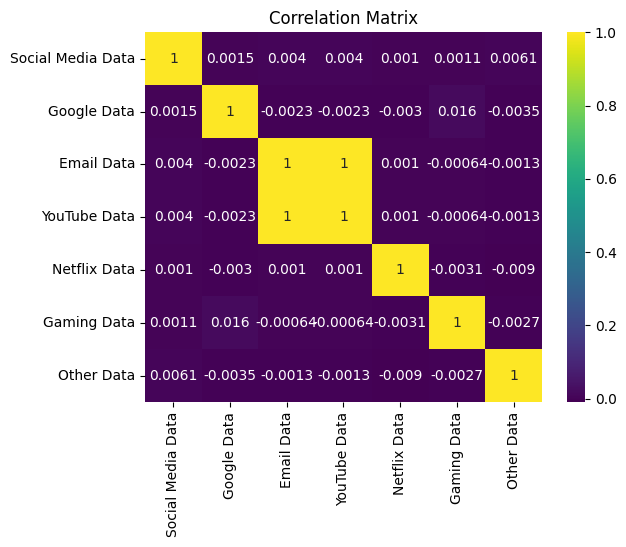

In [39]:
correlation_matrix = applicationData[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()


### Principal Component Analysis (PCA) for Dimensionality Reduction

In [40]:
import pandas as pd
from sklearn.decomposition import PCA


# Select only the desired columns
data_selected = applicationData[['Social Media Data', 'Google Data', 'Email Data', 'YouTube Data', 'Netflix Data', 'Gaming Data', 'Other Data']]

data_standardized = (data_selected - data_selected.mean()) / data_selected.std()

# Perform PCA
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(data_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

final_df = pd.concat([principal_df, xdr_data], axis=1)


In [41]:
principal_df.head(10)


,PC1,PC2
0,-1.202916,0.925657
1,1.437674,-1.089699
2,0.060232,-0.300208
3,2.592541,0.943101
4,-1.972574,0.815666
5,1.957314,-0.673074
6,1.588246,0.247680
7,0.526433,0.105303
8,1.228821,-1.378255
9,-1.919738,1.744641


In [42]:
final_df.head()


,PC1,PC2,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,...,Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class
0,-1.202916,0.925657,1.304243e+13,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,244912.0,2.082022e+08,33661.848209,...,20.777718,4.373580,789.467688,2.257461,159.416398,0.100667,17.930493,834.133937,852.064430,Decile 5
1,1.437674,-1.089699,7.277826e+12,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,244912.0,2.082014e+08,33698.968192,...,7.361239,14.898689,64.199571,10.026888,575.977464,8.478541,47.921617,95.220649,143.142266,Decile 5
2,0.060232,-0.300208,1.304243e+13,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,244912.0,2.082017e+08,33663.620239,...,6.454399,19.095671,115.025679,12.845795,797.504408,3.995473,43.101888,139.842223,182.944111,Decile 5
3,2.592541,0.943101,1.304243e+13,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,244912.0,2.082019e+08,33667.585643,...,20.759712,9.204089,481.270736,13.011424,320.998972,8.195716,33.544051,530.897456,564.441507,Decile 5
4,-1.972574,0.815666,7.349883e+12,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,244912.0,2.082015e+08,33645.696412,...,12.781484,8.924970,187.862645,16.085787,497.940391,4.757382,53.396982,222.602016,275.998998,Decile 5


## User Engagement Analysis 

### Aggregate metrics per customer

In [43]:
from scripts.tellcoAnalysis import analyze_user_engagement
aggregated_data_user_engagement, cluster_stats_user_engagement, top_10_most_engaged_users,normalized_data,engagement_clusters = analyze_user_engagement(xdr_data)


In [44]:
aggregated_data_user_engagement.head()


,Bearer Id,Dur. (ms),Total_DL_+_UL,clusters
MSISDN/Number,,,,
33601.675527,7.206746e+15,68224358.0,365902.452568,2
33601.712373,2.622897e+13,77006.0,679.233900,0
33601.712551,1.383508e+13,104956.0,1801.221892,0
33601.713789,2.925542e+13,240596.0,3174.674280,0
33601.714799,2.622897e+13,352044.0,356.661358,0


### Top 10 most engaged users per application

In [45]:
print(top_10_most_engaged_users)


MSISDN/Number  Google DL (Bytes)  Google UL (Bytes)  Email DL (Bytes)  Email UL (Bytes)  Youtube UL (Bytes)  Youtube DL (Bytes)  Netflix DL (Bytes)  Netflix UL (Bytes)  Gaming DL (Bytes)  Gaming UL (Bytes)  Other UL (Bytes)
33674.923685   10.979931          3.515773           2.432643          0.631541          21.501662           11.302577           12.156548           19.682682           840.912532         15.082146          14.698593           1907.248897
33664.689058   11.183808          3.873619           1.601413          0.933002          16.468684           13.064265           17.807619           21.802237           842.772173         8.811089           11.232779           1905.282668
33668.551754   9.458813           1.516648           2.004712          0.342808          21.646758           23.101979           22.409092           8.244742            835.939605         10.097405          15.894385           1904.614928
33658.809959   6.073984           1.061234           3.1762

### K-means clustering

### Calculate cluster metrics

In [46]:
cluster_stats_user_engagement.head()


Bearer Id                                            \
                   min           max          mean           sum   
clusters                                                           
0         1.383508e+13  4.435866e+14  2.820391e+13  2.539367e+18   
1         4.951088e+17  4.951088e+17  4.951088e+17  4.951088e+17   
2         7.206746e+15  7.206746e+15  7.206746e+15  7.206746e+15   

             Dur. (ms)                                            \
                   min           max          mean           sum   
clusters                                                           
0         1.429200e+04  8.270520e+06  2.769573e+05  2.493613e+10   
1         4.867482e+09  4.867482e+09  4.867482e+09  4.867482e+09   
2         6.822436e+07  6.822436e+07  6.822436e+07  6.822436e+07   

         Total_DL_+_UL                                            
                   min           max          mean           sum  
clusters                                                          
0         6.649802e+01  1.769245e+04  1.380726e+03  1.243151e+08  
1         2.404942e+07  2.404942e+07  2.404942e+07  2.404942e+07  
2         3.659025e+05  3.659025e+05  3.659025e+05  3.659025e+05

In [47]:
cluster_one = aggregated_data_user_engagement[aggregated_data_user_engagement['clusters']==0]
cluster_two = aggregated_data_user_engagement[aggregated_data_user_engagement['clusters']==1]
cluster_three = aggregated_data_user_engagement[aggregated_data_user_engagement['clusters']==2]




In [48]:
# Find top 10 customers per engagement metric
top_frequency = aggregated_data_user_engagement['Bearer Id'].nlargest(10)
top_duration = aggregated_data_user_engagement['Dur. (ms)'].nlargest(10)
top_traffic = aggregated_data_user_engagement['Total_DL_+_UL'].nlargest(10)


### Top Ten sessions frequencies

In [49]:
print(top_frequency)


MSISDN/Number
33734.564203    4.951088e+17
33601.675527    7.206746e+15
33625.779332    4.435866e+14
33659.725664    4.176459e+14
33675.877202    3.921375e+14
33667.163239    3.391031e+14
33627.080969    3.137388e+14
33659.359429    2.870775e+14
33669.068942    2.869334e+14
33626.320676    2.631546e+14
Name: Bearer Id, dtype: float64


<Axes: xlabel='MSISDN/Number'>

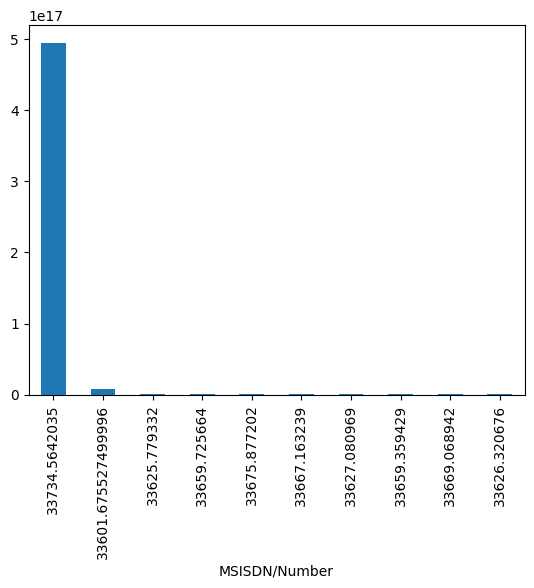

In [50]:
top_frequency.plot(kind='bar')


### Top ten session durations

In [51]:
print(top_duration)


MSISDN/Number
33734.564203    4.867482e+09
33601.675527    6.822436e+07
33625.779332    8.270520e+06
33626.320676    8.009202e+06
33614.892860    7.795158e+06
33659.725664    6.981216e+06
33675.877202    6.660522e+06
33667.163239    6.223718e+06
33603.127838    5.706758e+06
33627.080969    5.560940e+06
Name: Dur. (ms), dtype: float64


<Axes: xlabel='MSISDN/Number'>

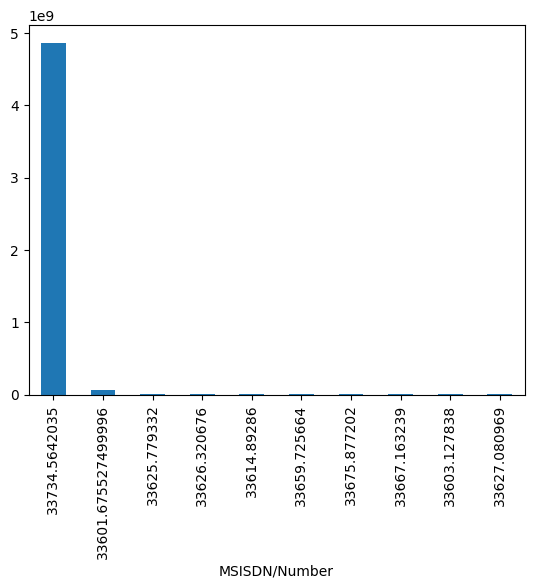

In [52]:
top_duration.plot(kind='bar')


### Top the total traffics

In [53]:
print(top_traffic)


MSISDN/Number
33734.564203    2.404942e+07
33601.675527    3.659025e+05
33614.892860    1.769245e+04
33625.779332    1.699924e+04
33626.320676    1.594233e+04
33675.877202    1.578222e+04
33659.725664    1.541173e+04
33666.464084    1.461700e+04
33664.712899    1.374469e+04
33698.792269    1.308180e+04
Name: Total_DL_+_UL, dtype: float64


<Axes: xlabel='MSISDN/Number'>

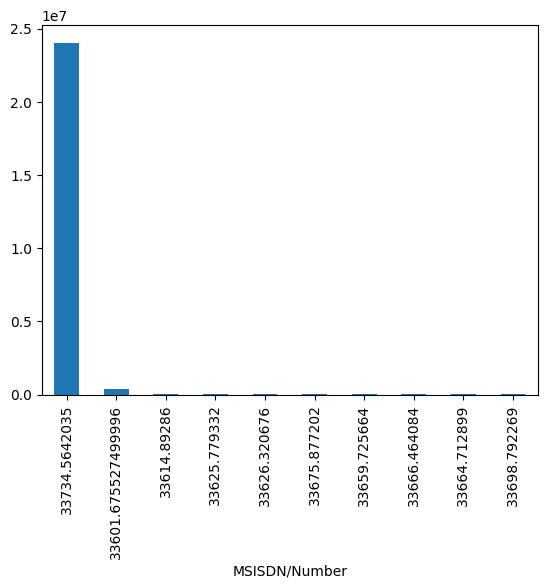

In [54]:
top_traffic.plot(kind='bar')


### Find most used applications

In [55]:
top_three_apps = xdr_data[['Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)','Email UL (Bytes)','Youtube UL (Bytes)','Youtube DL (Bytes)', 'Netflix DL (Bytes)','Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other UL (Bytes)']].sum().nlargest(3)


### Top three most used applications

<Axes: >

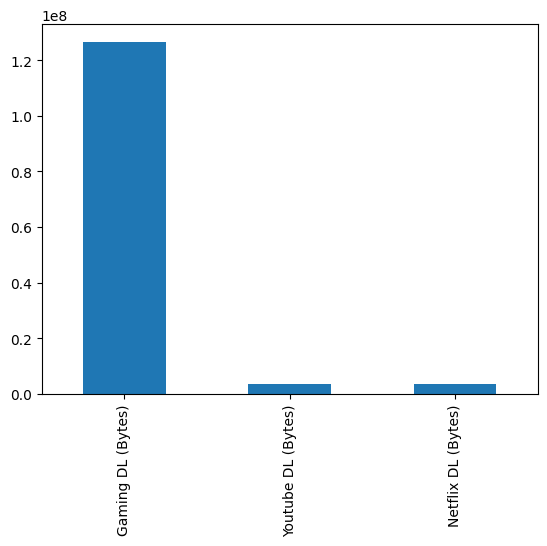

In [56]:
top_three_apps.plot(kind='bar')


### First cluster of user engagement

In [57]:
print(cluster_one)


                  Bearer Id  Dur. (ms)  Total_DL_+_UL  clusters
MSISDN/Number                                                  
33601.712373   2.622897e+13    77006.0     679.233900         0
33601.712551   1.383508e+13   104956.0    1801.221892         0
33601.713789   2.925542e+13   240596.0    3174.674280         0
33601.714799   2.622897e+13   352044.0     356.661358         0
33601.717042   1.469977e+13   255836.0     669.382882         0
...                     ...        ...            ...       ...
33699.998818   1.469977e+13   489824.0     672.867010         0
33699.999343   1.469977e+13   343344.0    1654.825704         0
33699.999410   1.383508e+13    18996.0    1168.801888         0
33699.999495   1.455565e+13   132090.0     962.132840         0
33699.999608   2.622897e+13   428418.0     789.506984         0

[90036 rows x 4 columns]


### Second cluster of user engagement

In [58]:
print(cluster_two)


                  Bearer Id     Dur. (ms)  Total_DL_+_UL  clusters
MSISDN/Number                                                     
33734.564203   4.951088e+17  4.867482e+09   2.404942e+07         1


### Third cluster of user engagement

In [59]:
print(cluster_three)


                  Bearer Id   Dur. (ms)  Total_DL_+_UL  clusters
MSISDN/Number                                                   
33601.675527   7.206746e+15  68224358.0  365902.452568         2


### Elbow method for defining the best number of clustering

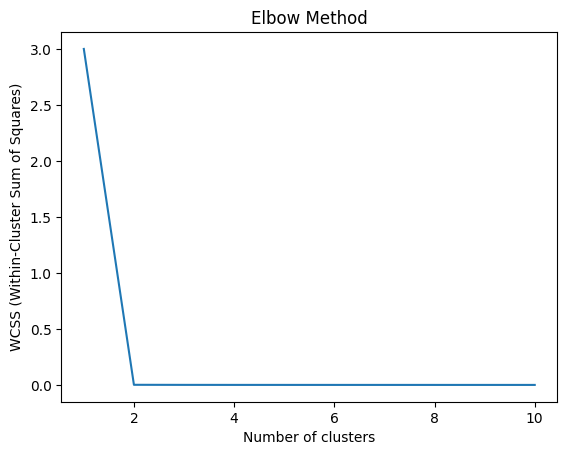

In [60]:
 # Elbow method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(normalized_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()


### Experience Analytics

#### Aggregate average TCP,RTT,TP and Handset type per user

In [61]:
from scripts.tellcoAnalysis import aggregate_average_xdr_data


In [62]:
aggregated_average_experience_analysis,experience_clusters = aggregate_average_xdr_data(xdr_data)


In [63]:
aggregated_average_experience_analysis.head(20)


,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
33601.675527,15.259102,0.585468,66.991436,8.645259,9263.906685,532.103064,Samsung Galaxy S9,1
33601.712373,20.809914,0.759659,110.000000,5.000000,23.000000,47.000000,Apple iPhone Se (A1723),1
33601.712551,0.575194,0.044040,145.000000,7.000000,7677.000000,2115.000000,Apple iPhone 6 (A1586),2
33601.713789,17.981367,0.441903,104.397853,18.831441,24626.750000,676.500000,Samsung Galaxy S8 Plus (Sm-G955F),0
33601.714799,20.809914,0.759659,29.000000,5.000000,63.000000,54.000000,Apple iPhone 7 Plus (A1784),1
33601.717042,20.809914,0.759659,109.795706,17.662883,12.000000,64.000000,Samsung Galaxy S8 (Sm-G950F),1
33601.718622,20.809914,0.759659,46.000000,8.000000,2952.500000,140.500000,Apple iPhone X (A1901),1
33601.719194,10.459467,0.759659,33.500000,20.828604,24627.750000,600.000000,Huawei P10 Lite,0
33601.720129,20.809914,0.759659,35.000000,5.000000,51.000000,48.000000,Huawei P20 Pro,1


In [64]:
aggregated_average_experience_analysis['Handset Type']


MSISDN/Number
33601.675527                    Samsung Galaxy S9
33601.712373              Apple iPhone Se (A1723)
33601.712551               Apple iPhone 6 (A1586)
33601.713789    Samsung Galaxy S8 Plus (Sm-G955F)
33601.714799          Apple iPhone 7 Plus (A1784)
                              ...                
33699.999343          Samsung Galaxy J5 (Sm-J530)
33699.999410               Apple iPhone 6 (A1586)
33699.999495                       Huawei P9 Lite
33699.999608                    Samsung Galaxy J7
33734.564203                     Huawei B528S-23A
Name: Handset Type, Length: 90038, dtype: object

### Find top, bottom, and most frequent values for TCP, RTT, and throughput

In [65]:
from scripts.tellcoAnalysis import find_top_bottom_frequent


In [66]:
# Find top, bottom, and most frequent values for TCP, RTT, and throughput
top_tcp_DL, bottom_tcp_DL, frequent_tcp_DL = find_top_bottom_frequent(aggregated_average_experience_analysis, 'TCP DL Retrans. Vol (Bytes)')
top_tcp_UL, bottom_tcp_UL, frequent_tcp_UL = find_top_bottom_frequent(aggregated_average_experience_analysis, 'TCP UL Retrans. Vol (Bytes)')
top_rtt_DL, bottom_rtt_DL, frequent_rtt_DL = find_top_bottom_frequent(aggregated_average_experience_analysis, 'Avg RTT DL (ms)')
top_rtt_UL, bottom_rtt_UL, frequent_rtt_UL = find_top_bottom_frequent(aggregated_average_experience_analysis, 'Avg RTT UL (ms)')
top_throughput_DL, bottom_throughputDL, frequent_throughput_DL = find_top_bottom_frequent(aggregated_average_experience_analysis, 'Avg Bearer TP DL (kbps)')
top_throughput_UL, bottom_throughput_UL, frequent_throughput_UL = find_top_bottom_frequent(aggregated_average_experience_analysis, 'Avg Bearer TP UL (kbps)')

# Print or analyze the results
print("Top TCP values:", top_tcp_DL)
print("Bottom TCP values:", top_tcp_UL)
print("Most frequent TCP values:", frequent_rtt_DL)
# similarly for RTT and throughput)


Top TCP values: MSISDN/Number
33650.170447    50.025388
33658.162536    50.025388
33658.733202    50.025388
33658.835336    50.025388
33659.611157    50.025388
33659.784222    50.025388
33659.879353    50.025388
33663.654533    50.025388
33664.016610    50.025388
33664.435233    50.025388
Name: TCP DL Retrans. Vol (Bytes), dtype: float64
Bottom TCP values: MSISDN/Number
33658.359153    1.804633
33658.870805    1.804633
33659.157016    1.804633
33660.988365    1.804633
33662.227523    1.804633
33662.293819    1.804633
33665.258666    1.804633
33666.967512    1.804633
33603.570263    1.804633
33615.079395    1.804633
Name: TCP UL Retrans. Vol (Bytes), dtype: float64
Most frequent TCP values: Avg RTT DL (ms)
109.795706    15445
221.989265     4755
28.000000      1981
27.000000      1669
34.000000      1543
37.000000      1387
35.000000      1383
38.000000      1376
29.000000      1318
36.000000      1292
Name: count, dtype: int64


### Analyzes the distribution of average throughput  view per handset type.

In [67]:
from scripts.tellcoAnalysis import analyze_handset_throughput_metrics


In [68]:
analyze_handset_throughput_metrics(aggregated_average_experience_analysis,'Avg Bearer TP DL (kbps)')


Average Throughput per Handset Type:

| Handset Type                                                                                |   Avg Bearer TP DL (kbps) |
|:--------------------------------------------------------------------------------------------|--------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                 6527      |
| A-Link Telecom I. Cubot Note S                                                              |                 8515      |
| A-Link Telecom I. Cubot Nova                                                                |                49210.5    |
| A-Link Telecom I. Cubot Power                                                               |                49210.5    |
| A-Link Telecom I. Cubot X18 Plus                                                            |                12108      |
| Acer Liquid M220                                                                            

In [69]:
analyze_handset_throughput_metrics(aggregated_average_experience_analysis,'Avg Bearer TP UL (kbps)')


Average Throughput per Handset Type:

| Handset Type                                                                                |   Avg Bearer TP UL (kbps) |
|:--------------------------------------------------------------------------------------------|--------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                 172       |
| A-Link Telecom I. Cubot Note S                                                              |                 422       |
| A-Link Telecom I. Cubot Nova                                                                |                 550       |
| A-Link Telecom I. Cubot Power                                                               |                 342       |
| A-Link Telecom I. Cubot X18 Plus                                                            |                 451       |
| Acer Liquid M220                                                                            

### Analyzes the distribution of average TCP retransmission view per handset type.


In [70]:
from scripts.tellcoAnalysis import analyze_handset_retrasmission_metrics


In [71]:
analyze_handset_retrasmission_metrics(aggregated_average_experience_analysis,'TCP DL Retrans. Vol (Bytes)')



Average TCP Retransmission Count per Handset Type:

| Handset Type                                                                                |   TCP DL Retrans. Vol (Bytes) |
|:--------------------------------------------------------------------------------------------|------------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                    0.602349   |
| A-Link Telecom I. Cubot Note S                                                              |                   41.3445     |
| A-Link Telecom I. Cubot Nova                                                                |                    0.13584    |
| A-Link Telecom I. Cubot Power                                                               |                    0.007799   |
| A-Link Telecom I. Cubot X18 Plus                                                            |                    1.33582    |
| Acer Liquid M220                                 

In [72]:
analyze_handset_retrasmission_metrics(aggregated_average_experience_analysis,'TCP UL Retrans. Vol (Bytes)')



Average TCP Retransmission Count per Handset Type:

| Handset Type                                                                                |   TCP UL Retrans. Vol (Bytes) |
|:--------------------------------------------------------------------------------------------|------------------------------:|
| A-Link Telecom I. Cubot Note Plus                                                           |                    0.013864   |
| A-Link Telecom I. Cubot Note S                                                              |                    0.067252   |
| A-Link Telecom I. Cubot Nova                                                                |                    0.00133    |
| A-Link Telecom I. Cubot Power                                                               |                    0.000242   |
| A-Link Telecom I. Cubot X18 Plus                                                            |                    0.390088   |
| Acer Liquid M220                                 

### K-means cluster

### Aggregated experience Cluster analysis

In [73]:
cluster_1 = aggregated_average_experience_analysis[aggregated_average_experience_analysis['clusters'] == 0]
cluster_2 = aggregated_average_experience_analysis[aggregated_average_experience_analysis['clusters'] == 1]
cluster_3 = aggregated_average_experience_analysis[aggregated_average_experience_analysis['clusters'] == 2]


### First cluster of Aggregated experience

In [74]:
cluster_1.head(cluster_1.size)


,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
33601.713789,17.981367,0.441903,104.397853,18.831441,24626.75,676.50,Samsung Galaxy S8 Plus (Sm-G955F),0
33601.719194,10.459467,0.759659,33.500000,20.828604,24627.75,600.00,Huawei P10 Lite,0
33601.722690,11.058901,0.437295,115.000000,6.500000,16849.50,1391.75,Apple iPhone Se (A1723),0
33601.726215,12.877313,0.384510,39.000000,9.000000,23351.50,1383.25,Huawei Lld-Al00,0
33601.728908,10.427166,0.004655,45.500000,39.657207,3879.00,2025.25,Samsung Galaxy S7 (Sm-G930X),0
...,...,...,...,...,...,...,...,...
33699.993510,1.312485,0.006848,26.000000,18.000000,27264.00,2729.50,Apple iPhone Se (A1723),0
33699.993599,5.760880,0.233833,42.000000,7.000000,33904.25,1861.50,Apple iPhone X (A1901),0
33699.995433,0.762494,0.759659,29.000000,39.657207,49210.50,1737.00,Google Inc G011C,0


### Second cluster of Aggregated experience

In [75]:
cluster_2.head(cluster_2.size)


,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
33601.675527,15.259102,0.585468,66.991436,8.645259,9263.906685,532.103064,Samsung Galaxy S9,1
33601.712373,20.809914,0.759659,110.000000,5.000000,23.000000,47.000000,Apple iPhone Se (A1723),1
33601.714799,20.809914,0.759659,29.000000,5.000000,63.000000,54.000000,Apple iPhone 7 Plus (A1784),1
33601.717042,20.809914,0.759659,109.795706,17.662883,12.000000,64.000000,Samsung Galaxy S8 (Sm-G950F),1
33601.718622,20.809914,0.759659,46.000000,8.000000,2952.500000,140.500000,Apple iPhone X (A1901),1
...,...,...,...,...,...,...,...,...
33699.998818,20.809914,0.759659,37.000000,2.000000,8.000000,13.000000,Samsung Galaxy J5 (Sm-J530),1
33699.999343,20.809914,0.759659,109.795706,17.662883,6.000000,9.000000,Samsung Galaxy J5 (Sm-J530),1
33699.999495,0.006785,0.759659,20.000000,9.000000,8018.000000,174.000000,Huawei P9 Lite,1


### Third cluster of Aggregated experience

In [76]:
cluster_3.head(cluster_3.size)


,TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Handset Type,clusters
MSISDN/Number,,,,,,,,
33601.712551,0.575194,0.044040,145.000000,7.000000,7677.000,2115.0,Apple iPhone 6 (A1586),2
33601.728581,0.000222,0.001330,162.000000,6.000000,85.000,44.0,Samsung Galaxy Y (Gt-S5360),2
33601.730392,0.019631,0.002237,192.000000,21.000000,3713.000,2295.0,Xiaomi Communica. Redmi Note5,2
33601.768566,7.419592,0.274625,131.663088,17.885736,6328.000,477.0,Huawei Honor 9 Lite,2
33601.798337,0.099152,0.004146,205.000000,8.000000,4324.000,255.0,Wiko Global Sasu Sunny3,2
...,...,...,...,...,...,...,...,...
33699.984618,2.635971,0.576832,103.224463,35.661464,3171.125,339.5,Huawei B528S-23A,2
33699.984842,3.281362,0.093167,221.989265,6.000000,6014.000,379.0,Wiko Global Sasu Sunny3,2
33699.990476,12.114087,0.490600,221.989265,27.000000,23584.000,1379.0,Samsung Galaxy J7,2


## Satisfaction Analysis

### Assign engagement and experience scores to users

In [77]:
from scripts.tellcoAnalysis import assign_engagement_experience_scores


In [78]:
data_with_scores = assign_engagement_experience_scores(xdr_data, aggregated_data_user_engagement,aggregated_average_experience_analysis)


In [79]:
data_with_scores.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class,engagement_score,experience_score
0,1.304243e+13,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,244912.0,2.082022e+08,33661.848209,3.552121e+07,L72021C,...,789.467688,2.257461,159.416398,0.100667,17.930493,834.133937,852.064430,Decile 5,7.193704e+15,2564.405247
1,7.277826e+12,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,244912.0,2.082014e+08,33698.968192,8.637690e+07,D87887C,...,64.199571,10.026888,575.977464,8.478541,47.921617,95.220649,143.142266,Decile 5,7.199468e+15,7920.228782
2,1.304243e+13,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,244912.0,2.082017e+08,33663.620239,8.637690e+07,T83879A,...,115.025679,12.845795,797.504408,3.995473,43.101888,139.842223,182.944111,Decile 5,7.193704e+15,9141.029841
3,1.304243e+13,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,244912.0,2.082019e+08,33667.585643,8.637690e+07,T21539C,...,481.270736,13.011424,320.998972,8.195716,33.544051,530.897456,564.441507,Decile 5,7.193704e+15,41538.118497
4,7.349883e+12,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,244912.0,2.082015e+08,33645.696412,3.594111e+07,L14934A,...,187.862645,16.085787,497.940391,4.757382,53.396982,222.602016,275.998998,Decile 5,7.199396e+15,7931.200222


### Calculate a satisfaction score based on the average of engagement and experience scores

In [80]:
from scripts.tellcoAnalysis import calculate_satisfaction_score, find_top_satisfied_customers


In [81]:
data_with_satisfaction = calculate_satisfaction_score(xdr_data)


### Data with satisfaction score

In [82]:
data_with_satisfaction.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class,engagement_score,experience_score,satisfaction_score
0,1.304243e+13,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,244912.0,2.082022e+08,33661.848209,3.552121e+07,L72021C,...,2.257461,159.416398,0.100667,17.930493,834.133937,852.064430,Decile 5,7.193704e+15,2564.405247,3.596852e+15
1,7.277826e+12,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,244912.0,2.082014e+08,33698.968192,8.637690e+07,D87887C,...,10.026888,575.977464,8.478541,47.921617,95.220649,143.142266,Decile 5,7.199468e+15,7920.228782,3.599734e+15
2,1.304243e+13,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,244912.0,2.082017e+08,33663.620239,8.637690e+07,T83879A,...,12.845795,797.504408,3.995473,43.101888,139.842223,182.944111,Decile 5,7.193704e+15,9141.029841,3.596852e+15
3,1.304243e+13,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,244912.0,2.082019e+08,33667.585643,8.637690e+07,T21539C,...,13.011424,320.998972,8.195716,33.544051,530.897456,564.441507,Decile 5,7.193704e+15,41538.118497,3.596852e+15
4,7.349883e+12,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,244912.0,2.082015e+08,33645.696412,3.594111e+07,L14934A,...,16.085787,497.940391,4.757382,53.396982,222.602016,275.998998,Decile 5,7.199396e+15,7931.200222,3.599698e+15


### Top ten satisfied customers

In [83]:
top_satisfied_customers = find_top_satisfied_customers(data_with_satisfaction, 10)

print("Top 10 satisfied customers:")
print(top_satisfied_customers)


Top 10 satisfied customers:
134785    33608.645229
284776    33608.645229
72337     33659.051810
222338    33659.051810
70907     33664.628099
220908    33664.628099
139780    33659.840148
289770    33659.840148
70120     33659.926667
220121    33659.926667
Name: MSISDN/Number, dtype: float64


### Build a regression model to predict customer satisfaction scores based on engagement and experience

In [84]:
from scripts.tellcoAnalysis import build_regression_model


In [85]:
model, r2, mse = build_regression_model(xdr_data)

print("R-squared:", r2)
print("Mean Squared Error:", mse)


R-squared: 1.0
Mean Squared Error: 2.235083581940301


## Make predictions

### Test if created model predict or not

In [86]:
new_user_data = pd.DataFrame({'engagement_score': [0.8,0.4],
                             'experience_score': [0.7,0.3]})

# Make predictions using the trained model
predicted_satisfaction_score = model.predict(new_user_data)

print("Predicted satisfaction score:", predicted_satisfaction_score)


Predicted satisfaction score: [2.24999954 1.8499998 ]


### Segment users into two clusters based on engagement and experience scores using k-means clustering

In [87]:
from scripts.tellcoAnalysis import segment_users_k_means


In [88]:
segmented_data = segment_users_k_means(xdr_data)


In [89]:
cluster_segmented_1=segmented_data[segmented_data['engagement_experience_segment']==0]
cluster_segmented_2=segmented_data[segmented_data['engagement_experience_segment']==1]


In [90]:
cluster_segmented_1.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class,engagement_score,experience_score,satisfaction_score,engagement_experience_segment
0,1.304243e+13,4/23/2019 2:33,374.0,4/26/2019 2:20,111.0,244912.0,2.082022e+08,33661.848209,3.552121e+07,L72021C,...,159.416398,0.100667,17.930493,834.133937,852.064430,Decile 5,7.193704e+15,2564.405247,3.596852e+15,0
2,1.304243e+13,4/23/2019 2:49,472.0,4/26/2019 16:58,161.0,244912.0,2.082017e+08,33663.620239,8.637690e+07,T83879A,...,797.504408,3.995473,43.101888,139.842223,182.944111,Decile 5,7.193704e+15,9141.029841,3.596852e+15,0
3,1.304243e+13,4/23/2019 2:51,927.0,4/26/2019 2:15,373.0,244912.0,2.082019e+08,33667.585643,8.637690e+07,T21539C,...,320.998972,8.195716,33.544051,530.897456,564.441507,Decile 5,7.193704e+15,41538.118497,3.596852e+15,0
5,1.304243e+13,4/23/2019 2:56,528.0,4/26/2019 3:32,539.0,244912.0,2.082014e+08,33664.961635,8.637690e+07,D85726C,...,520.439205,12.451416,26.449797,184.127859,210.577656,Decile 5,7.193704e+15,7922.639270,3.596852e+15,0
6,1.304243e+13,4/23/2019 2:57,472.0,4/26/2019 2:57,393.0,244912.0,2.082010e+08,33665.639832,8.637690e+07,D33038A,...,562.276617,13.465365,57.911829,152.493811,210.405640,Decile 5,7.193704e+15,5603.932658,3.596852e+15,0


In [91]:
cluster_segmented_2.head()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Total_DL_+_UL,decile_class,engagement_score,experience_score,satisfaction_score,engagement_experience_segment
1,7.277826e+12,4/23/2019 2:41,144.0,4/26/2019 2:41,429.0,244912.0,2.082014e+08,33698.968192,8.637690e+07,D87887C,...,575.977464,8.478541,47.921617,95.220649,143.142266,Decile 5,7.199468e+15,7920.228782,3.599734e+15,1
4,7.349883e+12,4/23/2019 2:55,453.0,4/26/2019 8:48,788.0,244912.0,2.082015e+08,33645.696412,3.594111e+07,L14934A,...,497.940391,4.757382,53.396982,222.602016,275.998998,Decile 5,7.199396e+15,7931.200222,3.599698e+15,1
12,7.277826e+12,4/23/2019 3:36,97.0,4/26/2019 3:35,8.0,244912.0,2.082017e+08,33659.172847,8.637690e+07,D84641C,...,729.457185,13.335283,56.719331,833.785175,890.504506,Decile 5,7.199468e+15,30136.958093,3.599734e+15,1
17,7.349883e+12,4/23/2019 3:55,617.0,4/26/2019 7:24,661.0,244912.0,2.082017e+08,33667.622202,3.529841e+07,D10643A,...,351.482206,12.124532,61.122370,705.537054,766.659424,Decile 5,7.199396e+15,7898.628486,3.599698e+15,1
23,7.277826e+12,4/23/2019 4:08,656.0,4/26/2019 6:43,423.0,244912.0,2.082018e+08,33666.277026,3.546391e+07,D31477C,...,395.609137,15.705852,59.335582,208.778447,268.114029,Decile 5,7.199468e+15,41538.230734,3.599734e+15,1


### Calculate the average satisfaction and experience scores for each of the two clusters

In [92]:
from scripts.tellcoAnalysis import aggregate_cluster_scores


In [93]:
cluster_scores = aggregate_cluster_scores(segmented_data)
print(cluster_scores)


                               satisfaction_score  experience_score
engagement_experience_segment                                      
0                                    3.596840e+15      14283.889900
1                                    3.599714e+15      12354.380662


### Export to Database

In [94]:
# from src.dbconnection import export_eng_exp_sat_to_psql, fetch_data_from_database


In [95]:
# export_eng_exp_sat_to_psql(xdr_data)


In [96]:
# fetch_data_from_database()
